| DS 2000  | 
|:----------:|
| Prof. Rachlin   |  
| Miscellaneous Data Sources |        
    
    

### Reading data with the csv module



Here's how we've been reading in this kind of data so far.

In [1]:
with open("clean.csv") as f:
    data = [line.strip().split(",") for line in f]
print(data)

[['NAME', 'AGE', 'LIKES_PYTHON', 'HOBBY'], ['Joe', '21', 'True', 'Fishing'], ['Ann', '20', 'True', 'Soccer'], ['Lee', '24', 'False', 'Painting'], ['Mary', '87', 'True', 'Motorcycles']]


This works reasonably well, but already we see a few problems. 

- We might want to discard the first line header, but what if there is no header
- Everything is converted to a string
- We are assuming that values are delimited by commas, but it could be a tab, semicolon or other character
- We have to re-write this code for every file

Let's create a more robust data reader.

In [2]:
def read_data(filename, header=False, sep=',', coltypes=[]):
    """ Read tabular data from a file.
        header: Whether the file has a header
        sep:    The value separator 
        coltypes The column data types """
    with open(filename, "r") as f:
        
        # Convert file to a list of lists
        data = [line.strip().split(sep) for line in f]
        
        # Discard header if there is one
        if header:
            data = data[1:]
            
        # Convert datatypes (if provided)
        if len(coltypes)>0:
            for record in data:
                for i,value in enumerate(record):
                    record[i] = coltypes[i](record[i])
                    
    return data
                
data = read_data("clean.csv", header=True, sep=',', coltypes=[str, int, bool, str])
print(data)

[['Joe', 21, True, 'Fishing'], ['Ann', 20, True, 'Soccer'], ['Lee', 24, True, 'Painting'], ['Mary', 87, True, 'Motorcycles']]


This is pretty nice, and will work fine when you have nicely formatted "clean" data. But data is rarely so kind. Data Scientists often spend more than half their time preparing their data: cleaning, reformating, filtering, and dealing with inconsistencies or missing values.  This is called *data munging* and its importance should not be under-estimated! Let's look at a messy version of this file:

In [3]:
more messy.csv

Some additional problems arise:
    
* There may be missing values (designated here as an empty value, but data providers might alternatively use a special code:  NA, N/A, ?, 999, -1, UNK, NIL, NULL, etc.) to indicate a missing value. Our data reader will choke trying to convert an empty string or a missing value code to an integer, float, or boolean.
* Some values may contain what we are assuming is a delimiter - a comma in this case. CSV format has a work-around, surround the entire value in quotes.  Our fancy data reader won't handle this at all.  

In [4]:
data = read_data("messy.csv")
print(data)

[['NAME', 'AGE', 'LIKES_PYTHON', 'HOBBY'], ['Joe', '21', 'True', 'Fishing'], ['Ann', '20', 'True', ''], ['Lee', '', 'False', '"Art', ' Acrylic Painting"'], ['Mary', '87', 'True', 'Motorcycles']]


Notice how the value **"Art, Acrylic Painting"** has been converted into two items, **'"Art'** and **' Acrylic Painting"'** and notice, also, the double-quotes embedded inside the items.  Trying to convert empty strings or missing value codes to ints, floats, or booleans will also be problematic. A better way to read data formatted like this (i.e., delimited data) is the `csv` module, which is built-in to Python. 

In [5]:
import csv
with open("messy.csv") as f:
    data = csv.reader(f)
    print(data)
    print(list(data))

[['NAME', 'AGE', 'LIKES_PYTHON', 'HOBBY'], ['Joe', '21', 'True', 'Fishing'], ['Ann', '20', 'True', ''], ['Lee', '', 'False', 'Art, Acrylic Painting'], ['Mary', '87', 'True', 'Motorcycles']]


The reader method has optional parameters for dealing with headers and different separators. We still have to deal with type conversions on our own.  The big advantages of using the **csv** module are:

- Simplicity: less code is good!
- Handles problematic missing values and values containing delimiters automatically.

How does pandas handle our messy data?

In [6]:
import pandas as pd

df = pd.read_csv('messy.csv')
df

NAME   AGE  LIKES_PYTHON                  HOBBY
0   Joe  21.0          True                Fishing
1   Ann  20.0          True                    NaN
2   Lee   NaN         False  Art, Acrylic Painting
3  Mary  87.0          True            Motorcycles

In [7]:
# a column of data (series)

df.AGE
df.AGE[3]
df.AGE.tolist()

[21.0, 20.0, nan, 87.0]

In [8]:
# a row of data (also a series)

df.iloc[2]
df.iloc[2]['LIKES_PYTHON']
df.iloc[2].tolist()

['Lee', nan, False, 'Art, Acrylic Painting']

### Excel Spreadsheets

With the **pandas** module, we can even read excel spreadsheets!

In [9]:
import pandas as pd

# df is shorthand for "Data Frame" - a table of data
grades = pd.read_excel('grades.xlsx', sheet_name='Grades')

print("Column headings:",list(grades.columns))
print("Homework 1 Grades: ", list(grades['HW1']))
print("Data for Bob:", list(grades.iloc[1]))



# We could make the student column the 'index'
roster = pd.read_excel('grades.xlsx', sheet_name='Roster', index_col='Student')
roster.loc['Bob']


Column headings: ['Student', 'HW1', 'HW2', 'HW3']
Homework 1 Grades:  [95, 87, 100]
Data for Bob: ['Bob', 87, 67, 89]


ID               456
Email    bob@neu.edu
Name: Bob, dtype: object

### JSON Files

JSON stands for Javascript Object Notation.  It is a data interchange format that is widely used on the web and for representing hierarchical data, something tabular flat files don't do so well.

You can learn more about JSON [here](https://www.json.org), but from a python point of view, JSON looks much like a dictionary.

In [10]:
more example.json

In [3]:
import json

with open("example.json") as json_file:
    data = json.load(json_file)
    
print(data)
print(data['users'])
print(data["users"][2])
print(data["users"][2]['age'])


# That's pretty hard to read!  Let's make the output pretty!
import pprint as pp
pp.PrettyPrinter().pprint(data)

{'users': [{'name': 'Joe', 'age': 22, 'likes_python': True, 'hobbies': ['fishing', 'biking', 'swimming']}, {'name': 'Mary', 'age': 87, 'likes_python': True, 'hobbies': ['motorcycles', 'poker', 'saxaphone']}, {'name': 'Ann', 'age': 8, 'likes_python': False, 'hobbies': ['minecraft', 'legos', 'soccer']}]}
[{'name': 'Joe', 'age': 22, 'likes_python': True, 'hobbies': ['fishing', 'biking', 'swimming']}, {'name': 'Mary', 'age': 87, 'likes_python': True, 'hobbies': ['motorcycles', 'poker', 'saxaphone']}, {'name': 'Ann', 'age': 8, 'likes_python': False, 'hobbies': ['minecraft', 'legos', 'soccer']}]
{'name': 'Ann', 'age': 8, 'likes_python': False, 'hobbies': ['minecraft', 'legos', 'soccer']}
8
{'users': [{'age': 22,
            'hobbies': ['fishing', 'biking', 'swimming'],
            'likes_python': True,
            'name': 'Joe'},
           {'age': 87,
            'hobbies': ['motorcycles', 'poker', 'saxaphone'],
            'likes_python': True,
            'name': 'Mary'},
           {'age

### Now, let's use the `json` and `requests` modules to call web-service APIs

Application Programming Interfaces (APIs) provide a general means of interacting with other programs. More specifically, many websites will provide data via a web API -- this means we can make *requests* to remote applications / websites for data. Here's what this looks like schematically.

![alt text](https://cdn-images-1.medium.com/max/2000/1*q9CRTmO258jWLsMZAd5JLw.png "Image credit: http://www.robert-drummond.com/2013/05/08/how-to-build-a-restful-web-api-on-a-raspberry-pi-in-javascript-2/")


The way that we do this in Python is via the `requests` module. The idea is that the Response (in the above depiction) is nicely formatted `json`, which feels a lot like the dictionaries you now know and love. 

Here is an example of calling the Yelp API.  It requires that we have registered our application with Yelp in order to obtain an API KEY.  This will be our way of telling Yelp who we are.  It's how we authenticate our request with Yelp.  Yelp will keep track of how many requests we make and place daily limits on our usage (5000 API calls per day.)  According to the Yelp API documentation, we must pass our API_KEY using a request header (discussed below) of the form:

**Authorization: Bearer API_KEY**

There are also additional parameters we can specify like the location (Boston) and the type of business we are looking for (Pizza). 



In [4]:
import requests

API_KEY = 'k04EveojLDWtsNI9D_GcEAYSDLNThcspgKOAPuP3TgaCH7u97JdAtaoFni8FiD612pkEJRQyvkSI0iCMXbM8xVWe6e6N0_KWNB-e1zQw7JR1Qv-hg_R-Rwy0L7TMXXYx'

API_URL = 'https://api.yelp.com/v3/businesses/search'

myheaders = {'Authorization' : 'Bearer {}'.format(API_KEY)}
myparams = {'location':'Boston', 'term':'Pizza', 'limit':50}
response = requests.get(API_URL, params=myparams, headers=myheaders)

print(response.status_code)

import pprint
pp.PrettyPrinter().pprint(response.json())


200
{'businesses': [{'alias': 'regina-pizza-boston-4',
                 'categories': [{'alias': 'pizza', 'title': 'Pizza'},
                                {'alias': 'italian', 'title': 'Italian'}],
                 'coordinates': {'latitude': 42.36542659544545,
                                 'longitude': -71.0568833173494},
                 'display_phone': '(617) 227-0765',
                 'distance': 2283.782975541495,
                 'id': 'htEuhPBhBgMs6ShlT3G3JA',
                 'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/rPG03lJzJVlrTJNrQnuQxg/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '11 1/2 Thacher St',
                              'address2': '',
                              'address3': '',
                              'city': 'Boston',
                              'country': 'US',
                              'display_address': ['11 1/2 Thacher St',
                                                  'Boston, MA

Could there be a relationship between the rating of the pizza place and the number of reviews?  Let's find out!

In [5]:
json = response.json()
pizza = json['businesses']
len(pizza)

#[place.get('price','?') for place in pizza]


50

Text(0, 0.5, 'Number of Yelp Reviews')

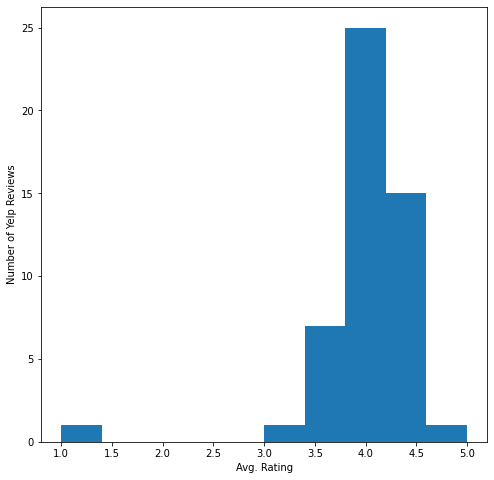

In [6]:
json = response.json()
pizza = json["businesses"]

ratings = [place['rating'] for place in pizza] # if place.get('price','?')=='$$$']
#reviews = [place['review_count'] for place in pizza] # if place.get('price','?')=='$']

#import sklearn.linear_model as lm
#indep = [[x] for x in ratings]
#model = lm.LinearRegression().fit(indep, reviews)
#predicted = model.predict(indep)


%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.hist(ratings)
#plt.hist(reviews)
#plt.scatter(ratings, reviews)
plt.xlabel("Avg. Rating")
plt.ylabel("Number of Yelp Reviews")
    

As another an example, reddit makes it possible to fetch content from sub-redit streams. The documentation for this API is found here. In particular, let's fetch some recent cat photos from reddit - because we haven't seen enough cat photos on the Internet, right?

### A note about HTTP headers
When we make an API call, we may have to supply additional metadata about our request in the form of key-value pairs. Which request headers we have to supply is API-specific. The reddit API requires that we supply a descriptive value for the 'User-Agent'. The User-Agent attribute is used to define the caller, the browser, or the application being used to make the API request. In otherwords, reddit is telling us that we can freely access their database via a documented API call, but they want to know who's calling! Additional rules for using the reddit API can be found here: https://www.reddit.com/dev/api/


In [15]:
import requests
import json

# here's we're hitting the 'new' endpoint, see: https://www.reddit.com/dev/api/#GET_new
my_headers = {'User-agent': 'a cat bot API call demonstration for NEU DS2000'}

# Make the request.  BTW, the result you get is likely to change every few minutes.
# Cat's are really really popular on reddit!

response = requests.get('https://www.reddit.com/r/cats/new.json?limit=10', headers=my_headers)
print(response)

import pprint
cats = response.json()
pp.PrettyPrinter().pprint(cats)


<Response [200]>
{'data': {'after': 't3_u1yw4m',
          'before': None,
          'children': [{'data': {'all_awardings': [],
                                 'allow_live_comments': False,
                                 'approved_at_utc': None,
                                 'approved_by': None,
                                 'archived': False,
                                 'author': 'moody_economist22',
                                 'author_flair_background_color': None,
                                 'author_flair_css_class': None,
                                 'author_flair_richtext': [],
                                 'author_flair_template_id': None,
                                 'author_flair_text': None,
                                 'author_flair_text_color': None,
                                 'author_flair_type': 'text',
                                 'author_fullname': 't2_b3u8t31f',
                                 'author_is_blocked': False

In [16]:
# How many items did we receive?
# We asked for at most 10.
len(cats['data']['children'])

10

So these are the top 10 posts. Let's look at the first.

In [17]:
first_post = cats['data']['children'][0]
print("URL:",first_post['data']['url'])
print("CAPTION:",first_post['data']['title'])


URL: https://i.redd.it/3ttuw2rsn3t81.jpg
CAPTION: This is the first photograph I clicked using my new phone and just used a B/W filter!!


In [18]:
# Let's see some cats!

from IPython.display import Image
Image(url= first_post['data']['url'])